In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker

In [2]:
url = 'https://footballapi.pulselive.com/football/standings'
params = {'compSeasons': 210, 'altIds': 'true', 'detail': 2, 'FOOTBALL_COMPETITION': 1, 'gameweekNumbers': None}

In [3]:
# lay bang xep hang tung tuan cua mua giai 2018-2019:
season = {}
import time

for w in range(1, 39):
    params['gameweekNumbers'] = f'1-{w}'
    r = requests.get(url, params=params)
    table = r.json()['tables'][0]['entries']
    week = []
    for team in table:
        name = team['team']['name']
        pos = team['position']
        point = team['overall']['points']
        week.append((name, point, pos))
    season[w] = week
    time.sleep(1)


In [4]:
season[1]

[('Liverpool', 3, 1),
 ('Chelsea', 3, 2),
 ('AFC Bournemouth', 3, 3),
 ('Crystal Palace', 3, 4),
 ('Manchester City', 3, 5),
 ('Watford', 3, 6),
 ('Manchester United', 3, 7),
 ('Tottenham Hotspur', 3, 8),
 ('Everton', 1, 9),
 ('Wolverhampton Wanderers', 1, 10),
 ('Burnley', 1, 11),
 ('Southampton', 1, 12),
 ('Leicester City', 0, 13),
 ('Newcastle United', 0, 14),
 ('Arsenal', 0, 15),
 ('Brighton and Hove Albion', 0, 16),
 ('Cardiff City', 0, 17),
 ('Fulham', 0, 18),
 ('Huddersfield Town', 0, 19),
 ('West Ham United', 0, 20)]

In [5]:
colors = {
    'Liverpool': 'r',
    'Arsenal': '#cab128',
    'Manchester City': '#6daef6',
    'Manchester United': 'r',
    'Brighton and Hove Albion': '#4a81be',
    'Tottenham Hotspur': '#f0f2f3',
    'AFC Bournemouth': 'y',
    'Cardiff City': 'b',
    'Everton': 'b',
    'Burnley': 'r',
    'Fulham': 'y',
    'Leicester City': 'b',
    'Wolverhampton Wanderers': 'y',
    'Crystal Palace': 'black',
    'Chelsea': 'b',
    'West Ham United': 'r',
    'Huddersfield Town': 'b',
    'Newcastle United': 'white',
    'Southampton': 'r',
    'Watford': 'y'
}

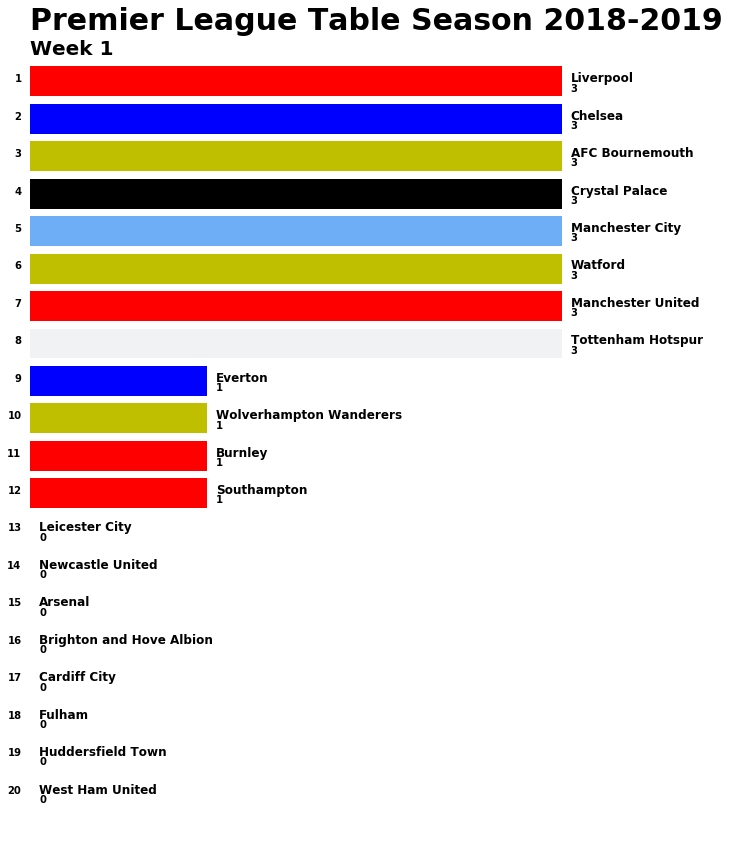

In [7]:
dx= .05
fig, ax = plt.subplots(figsize=(10, 15))

def plot(w):
    df = pd.DataFrame(season[w], columns=['team', 'point', 'pos'])[::-1]
    ax.clear()
    ax.barh(df.team, df.point, color=[colors[name] for name in df.team])
    for i in range(len(df)):
        ax.text(df.iloc[i].point + dx, i, df.iloc[i].team,size=12, weight=600, ha='left')
        ax.text(df.iloc[i].point + dx, i-.25, df.iloc[i].point, weight=600, ha='left')
        ax.text(0 - dx, i, df.iloc[i].pos, weight=600, ha='right')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.text(0, 1, 'Premier League Table Season 2018-2019', transform=ax.transAxes, size=30, weight=600)
    ax.text(0, 0.97, f'Week {w}', transform=ax.transAxes, size=20, weight=600)
    plt.box(False)
    
plot(1)

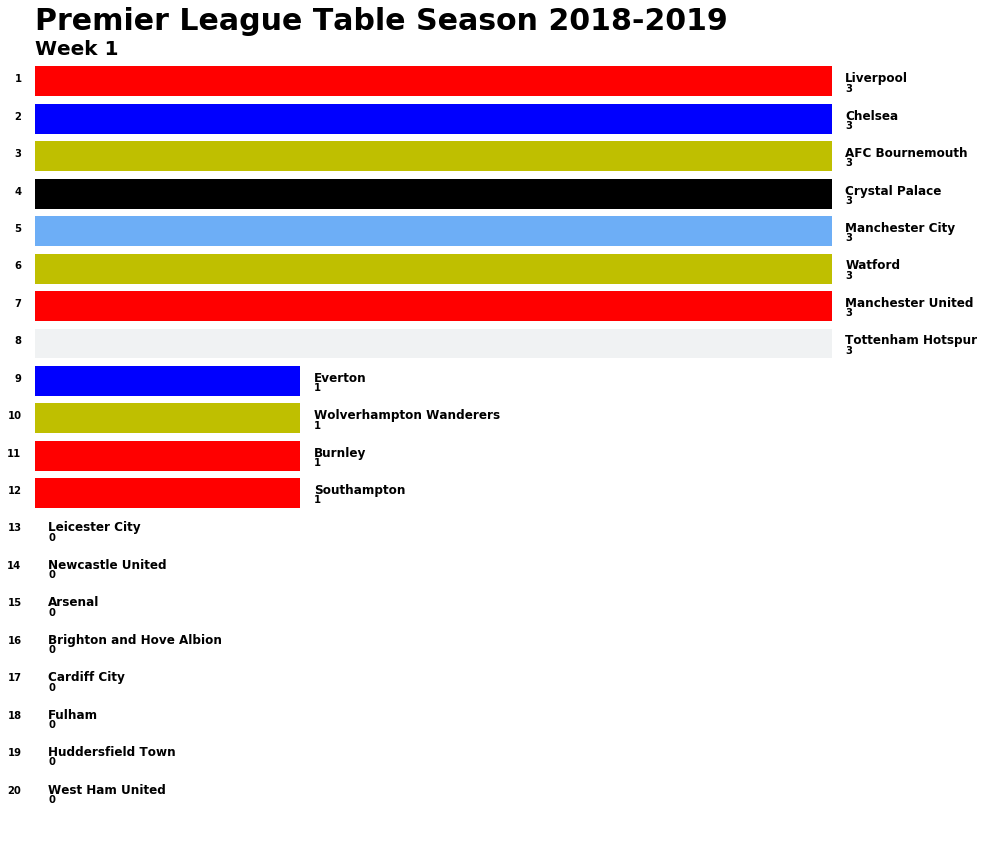

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 15))
animator = animation.FuncAnimation(fig, plot, frames=range(1, 39))
HTML(animator.to_jshtml()) 